**Previsão de temperatura**

In [ ]:
import pandas as pd                                   #utilizado para a construção os dataframes e análise exploratória
import numpy as np                                    #utilizado para a operações vetoriais e matriciais
import matplotlib.pyplot as plt                       #utilizado para construção de gráficos
from sklearn.linear_model import LinearRegression     #utilizada para a construção do modelo de regressão linear

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
IOT_temp = pd.read_csv(r'/content/drive/MyDrive/logs.csv')

Mounted at /content/drive


In [ ]:
# Dataset items
IOT_temp.head(5)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


*Mostrando os dados*



1.   id -> identificador único para cada medida.
2.   room_id/id -> id do local onde o dispositivo foi instalado
3.   noted_date -> data da leitura
4.   temp -> valor da temperatura medida
5.   out/in -> indica se o dispositivo foi instalado no ambiente interno(in) ou no ambiente externo (out) 



In [ ]:
# Dataset types
IOT_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


**Quantos tipos de dados distintos existem?**


**Quantos valores nulos existem?**

In [ ]:
IOT_temp.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [ ]:
# Obtaning descritive stats from the dataset
IOT_temp.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


**Qual é a mediana das temperaturas medidas?**

In [ ]:
IOT_temp['temp'].median()

35.0

In [ ]:
# Counts how many items are in and out
IOT_temp.groupby("out/in").count()['id']

out/in
In     20345
Out    77261
Name: id, dtype: int64

**Qual é o percentual dos dados de temperaturas coletados no ambiente externo (out)?**

In [ ]:
IOT_temp.groupby("out/in").count()['id']['Out'] / len(IOT_temp['out/in'])

0.7915599450853431

In [ ]:
# Splits dataset
df_in=IOT_temp[IOT_temp["out/in"]=="In"]
df_out=IOT_temp[IOT_temp["out/in"]=="Out"]
df_out.head(5)

,id,room_id/id,noted_date,temp,out/in
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
10,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
11,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
16,__export__.temp_log_196094_38501388,Room Admin,08-12-2018 09:21,41,Out


In [ ]:
# Resets index for internal temperature
df_in.reset_index(drop=True)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
3,__export__.temp_log_196125_b0fa0b41,Room Admin,08-12-2018 09:29,31,In
4,__export__.temp_log_196121_01544d45,Room Admin,08-12-2018 09:28,29,In
...,...,...,...,...,...
20340,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
20341,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
20342,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
20343,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


<Figure size 720x720 with 0 Axes>

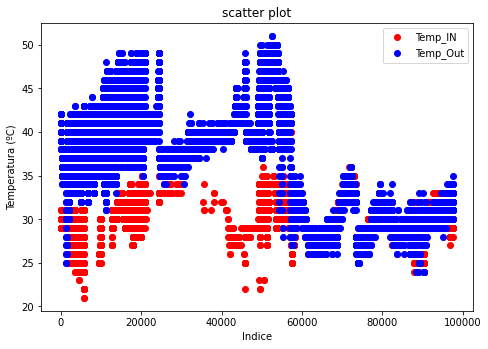

In [ ]:
# Plots the values
plt.figure(figsize=(10,10))
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_in.index, df_in.temp, color='r')
ax.scatter(df_out.index, df_out.temp, color='b')
ax.set_xlabel('Indice')
ax.set_ylabel('Temperatura (ºC)')
ax.legend(["Temp_IN", "Temp_Out"])
ax.set_title('scatter plot')
plt.show()

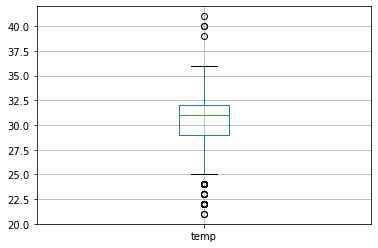

In [ ]:
# Use bloxplot do identify possible outliers
df_in.boxplot("temp");

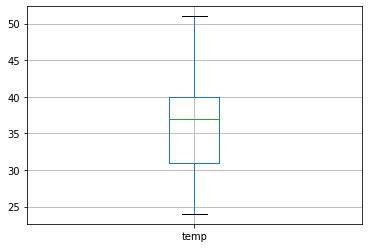

In [ ]:
df_out.boxplot("temp");

**Sobre o boxplot dos dados de temperatura interna(in) e externa(out), o que podemos dizer sobre os possíveis outliers?**

In [ ]:
temperatura=df_in.sample(n=2000,random_state=32)['temp']

In [ ]:
temperatura

77697    30
65783    29
84342    28
4598     24
94207    32
         ..
812      29
21196    31
445      29
97111    29
73737    28
Name: temp, Length: 2000, dtype: int64

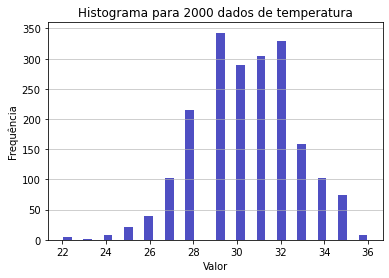

In [ ]:
n, bins, patches = plt.hist(x=temperatura, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Histograma para 2000 dados de temperatura');

In [ ]:
# Use D'Agostino's test to verify data normality
from scipy.stats import normaltest
f_valor, p_valor = normaltest(temperatura)                 # Applies test
print('f-valor=%.3f, p-valor=%.3f' % (f_valor, p_valor))
alpha = 0.05                                               # Significance level
if p_valor > alpha:
	print('Não rejeita H0')
else:
	print('Rejeita H0')

f-valor=3.881, p-valor=0.144
Não rejeita H0


**Analisando o histograma e o resultado do teste, o que podemos falar sobre a normalidade dos dados?**

In [ ]:
# Modifies data types for dates
df_in['noted_date']= pd.to_datetime(df_in['noted_date'],errors='coerce') 

<ipython-input-45-1b0d84a9b206>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in['noted_date']= pd.to_datetime(df_in['noted_date'],errors='coerce')


**Quantos tipos de dados existem agora no df_in?**

In [ ]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20345 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          20345 non-null  object        
 1   room_id/id  20345 non-null  object        
 2   noted_date  20345 non-null  datetime64[ns]
 3   temp        20345 non-null  int64         
 4   out/in      20345 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 953.7+ KB


**Após a transformação do tipo de dados, foram introduzidos valores nulos?**

In [ ]:
df_in.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [ ]:
# Sorts the dataset
df_in=df_in.sort_values(by=['noted_date'])
df_in.head()

,id,room_id/id,noted_date,temp,out/in
16218,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In
16186,__export__.temp_log_128828_1f2ca69c,Room Admin,2018-01-11 02:12:00,32,In
16176,__export__.temp_log_142141_12bd7384,Room Admin,2018-01-11 02:44:00,32,In
16174,__export__.temp_log_106858_cdf61926,Room Admin,2018-01-11 02:46:00,32,In
16167,__export__.temp_log_120068_a0fc57cc,Room Admin,2018-01-11 02:58:00,31,In


In [ ]:
# Reset indexes
df_in.reset_index(drop=True)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In
1,__export__.temp_log_128828_1f2ca69c,Room Admin,2018-01-11 02:12:00,32,In
2,__export__.temp_log_142141_12bd7384,Room Admin,2018-01-11 02:44:00,32,In
3,__export__.temp_log_106858_cdf61926,Room Admin,2018-01-11 02:46:00,32,In
4,__export__.temp_log_120068_a0fc57cc,Room Admin,2018-01-11 02:58:00,31,In
...,...,...,...,...,...
20340,__export__.temp_log_41083_917dc7ae,Room Admin,2018-12-10 20:25:00,35,In
20341,__export__.temp_log_41090_c0ed0bd1,Room Admin,2018-12-10 20:35:00,34,In
20342,__export__.temp_log_41091_8546ae99,Room Admin,2018-12-10 20:37:00,35,In
20343,__export__.temp_log_41129_77d8da57,Room Admin,2018-12-10 21:31:00,34,In


In [ ]:
# Same procedure for out dataframe now...
df_out['noted_date']= pd.to_datetime(df_out['noted_date']) 
df_out=df_out.sort_values(by=['noted_date'])
df_out.reset_index(drop=True)

<ipython-input-50-e451b23e8e32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['noted_date']= pd.to_datetime(df_out['noted_date'])


,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_146101_e61c18d4,Room Admin,2018-01-11 00:07:00,40,Out
1,__export__.temp_log_111262_7b3ed086,Room Admin,2018-01-11 00:09:00,39,Out
2,__export__.temp_log_147650_344507e9,Room Admin,2018-01-11 00:13:00,40,Out
3,__export__.temp_log_139505_cd77d7f9,Room Admin,2018-01-11 00:23:00,40,Out
4,__export__.temp_log_127981_32c85db7,Room Admin,2018-01-11 00:25:00,40,Out
...,...,...,...,...,...
77256,__export__.temp_log_41241_36e995ef,Room Admin,2018-12-10 23:41:00,44,Out
77257,__export__.temp_log_41244_1cef6363,Room Admin,2018-12-10 23:43:00,44,Out
77258,__export__.temp_log_41249_7d6819cd,Room Admin,2018-12-10 23:49:00,44,Out
77259,__export__.temp_log_41250_eed95540,Room Admin,2018-12-10 23:51:00,45,Out


In [ ]:
print("Registros existentes no df_IN: ",df_in.count()[0])
print("Registros existentes no df_OUt: ",df_out.count()[0])

Registros existentes no df_IN:  20345
Registros existentes no df_OUt:  77261


In [ ]:
# Statistically compares both temperatures
frame = { 'temp_in': df_in.temp, 'temp_out': df_out.temp } 
df_in_out=pd.DataFrame(frame)
df_in_out.head()

,temp_in,temp_out
0,29.0,NaN
1,29.0,NaN
2,NaN,41.0
3,NaN,41.0
4,31.0,NaN


In [ ]:
df_in_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97606 entries, 0 to 97605
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp_in   20345 non-null  float64
 1   temp_out  77261 non-null  float64
dtypes: float64(2)
memory usage: 2.2 MB


In [ ]:
table = pd.pivot_table(IOT_temp, values='temp', index=['noted_date'], columns= ["out/in"],fill_value=0)
table

out/in,In,Out
noted_date,,
01-11-2018 00:06,32.0,0.0
01-11-2018 00:07,0.0,40.0
01-11-2018 00:09,0.0,39.0
01-11-2018 00:13,0.0,40.0
01-11-2018 00:23,0.0,40.0
...,...,...
31-10-2018 23:52,0.0,40.0
31-10-2018 23:53,0.0,39.0
31-10-2018 23:54,32.0,0.0


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


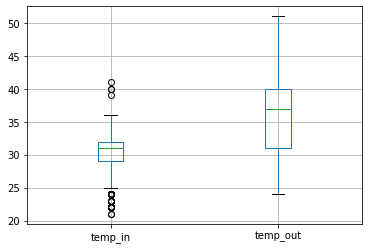

In [ ]:
df_in_out.boxplot();

**Analisando o boxplot da temp_in e temp_out, o que é possível afirmar?**

In [ ]:
df_out_new=IOT_temp[IOT_temp["out/in"]=="Out"]["temp"].values

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
serie_out = scaler.fit_transform(df_out_new.reshape(-1, 1))

In [ ]:
serie_out

array([[0.62962963],
       [0.62962963],
       [0.66666667],
       ...,
       [0.2962963 ],
       [0.2962963 ],
       [0.2962963 ]])

In [ ]:
# Defines the quantity of data
train=serie_out[:int(len(serie_out)*0.7)]      # 70% for training
test=serie_out[int(len(serie_out)*0.7):]       # 30% for test

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 3                       # Number of steps for autocorrelation
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM

In [ ]:
# Creates the model
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

**Sobre a rede LSTM criada, o que é correto dizer?**

In [ ]:
# Trains the model
historico=model.fit(trainX, trainY, validation_split=0.2,epochs=10, batch_size=100, verbose=2)

Epoch 1/10
433/433 - 9s - loss: 0.0108 - val_loss: 0.0097 - 9s/epoch - 20ms/step
Epoch 2/10
433/433 - 2s - loss: 0.0013 - val_loss: 0.0036 - 2s/epoch - 4ms/step
Epoch 3/10
433/433 - 1s - loss: 6.2362e-04 - val_loss: 0.0012 - 1s/epoch - 3ms/step
Epoch 4/10
433/433 - 2s - loss: 4.5672e-04 - val_loss: 9.1429e-04 - 2s/epoch - 4ms/step
Epoch 5/10
433/433 - 2s - loss: 4.4278e-04 - val_loss: 8.7759e-04 - 2s/epoch - 3ms/step
Epoch 6/10
433/433 - 2s - loss: 4.3986e-04 - val_loss: 8.6108e-04 - 2s/epoch - 4ms/step
Epoch 7/10
433/433 - 2s - loss: 4.3813e-04 - val_loss: 8.6622e-04 - 2s/epoch - 4ms/step
Epoch 8/10
433/433 - 1s - loss: 4.3520e-04 - val_loss: 8.4305e-04 - 1s/epoch - 3ms/step
Epoch 9/10
433/433 - 1s - loss: 4.3354e-04 - val_loss: 8.7240e-04 - 1s/epoch - 3ms/step
Epoch 10/10
433/433 - 2s - loss: 4.3103e-04 - val_loss: 8.5818e-04 - 2s/epoch - 4ms/step


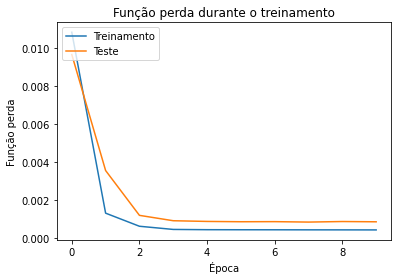

In [ ]:
# Plots the charts for the loss function
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Função perda durante o treinamento')
plt.ylabel('Função perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()

**Analisando o gráfico da função perda, o que é incorreto afirmar?**

In [ ]:
# Making predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

725/725 [==============================] - 1s 2ms/step


In [ ]:
# Formts data
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# Understands the quality of the model
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Calculates the predictions error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Pontuação para o treinamento: %.2f MSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Pontuação para o teste: %.2f MSE' % (testScore))

Pontuação para o treinamento: 0.61 MSE
Pontuação para o teste: 0.69 MSE


**Analisando o MSE mostrado para o treinamento e teste do algoritmo, o que é incorreto afirmar?**

In [ ]:
# Shift values to build its plot
trainPredictPlot = np.empty_like(serie_out)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# Shift prediction values to training
testPredictPlot = np.empty_like(serie_out)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(serie_out)-1, :] = testPredict

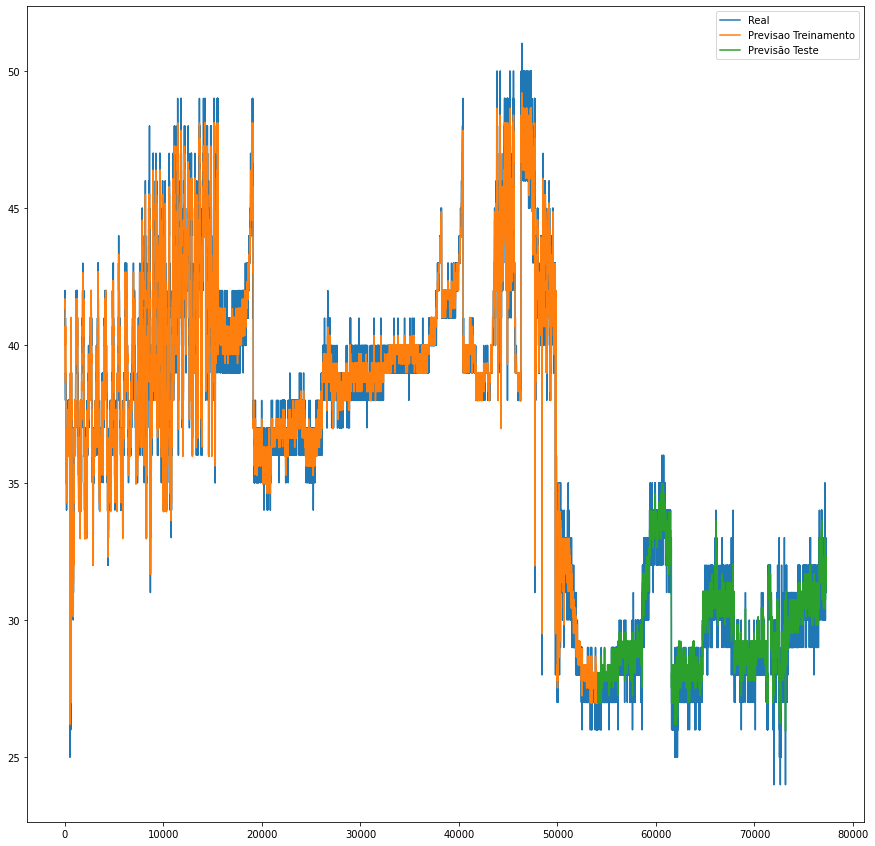

In [ ]:
# Plot data for trainign and testing
plt.figure(figsize=(15,15))
plt.plot(scaler.inverse_transform(serie_out))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["Real","Previsao Treinamento","Previsão Teste"])
plt.show()